In [1]:
import torch
import torchvision.transforms as transforms
from utils import get_images_labels, match_label_video, match_label_fou_clean2, imread_rgb
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import misc

%matplotlib inline

In [16]:
dataset = 'data/pre_proc/fourviere_video2_224sq'
dataset_test = 'data/pre_proc/fourviere_video2_224sq/test'
match = match_label_video

dataSetFull = get_images_labels(dataset, match)
testSetFull = get_images_labels(dataset_test, match)
labels = set(lab for im, lab in dataSetFull)
print(len(dataSetFull))
print(len(testSetFull))
print(len(labels))
print(sum(1 for _, lab in testSetFull if lab not in labels))

1815
624
161
0


[('data/pre_proc/fourviere_video2_224sq/test/A_002-u3_A-11.44.jpg', 'A_002'), ('data/pre_proc/fourviere_video2_224sq/test/A_002-u3_A-14.2.jpg', 'A_002')]
((224, 224, 3), 97.600240486819729, [103.53188775510205, 101.39233896683673, 87.876494738520407])


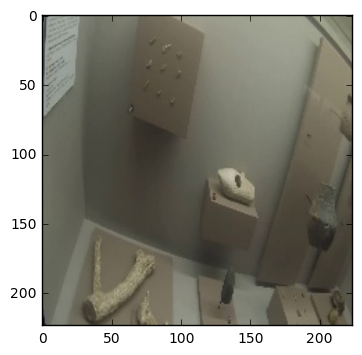

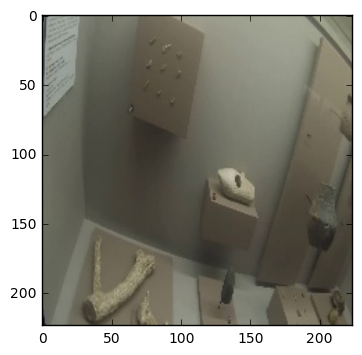

((224, 224, 3), 72.177136479591837, [77.605927136479593, 74.380161830357139, 64.54532047193878])


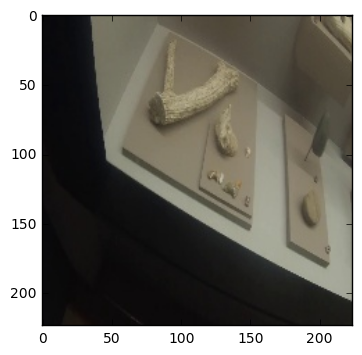

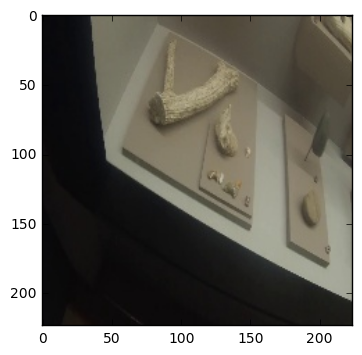

In [3]:
print(testSetFull[:2])
for im, lab in testSetFull[:2]:
    if lab in labels:
        im_o = imread_rgb(im)
        print(im_o.shape, np.mean(im_o), [np.mean(im_o[:,:,i]) for i in range(3)])
        plt.imshow(im_o / 255.)
        plt.show()
        t = transforms.ToPILImage()(transforms.ToTensor()(im_o))
        plt.imshow(t)
        plt.show()

In [4]:
lab_dict ={}
for im, lab in dataSetFull:
    if lab in labels:
        if lab in lab_dict:
            lab_dict[lab] += 1
        else:
            lab_dict[lab] = 1
print(len(labels))
print(len(lab_dict))
print(len(testSetFull))
print(sum(lab_dict[x] for x in lab_dict))
print(sum(lab_dict[lab] for im, lab in testSetFull))
print(sorted(lab_dict.items(), key=lambda x: x[1]))

161
161
624
1815
8438
[('D_043', 1), ('D_024', 1), ('A_049', 1), ('D_013', 1), ('D_072', 1), ('C_024', 1), ('D_066', 1), ('D_052', 2), ('C_087', 2), ('A_048', 2), ('C_063', 2), ('C_023', 2), ('D_064', 2), ('D_068', 2), ('B_064', 3), ('D_053', 3), ('D_050', 3), ('C_004', 3), ('D_040', 3), ('D_047', 3), ('A_042', 3), ('A_051', 3), ('B_028', 3), ('D_006', 3), ('D_039', 3), ('C_050', 3), ('B_048', 3), ('D_079', 3), ('C_031', 4), ('B_063', 4), ('D_058', 4), ('D_045', 4), ('C_066', 4), ('B_032', 4), ('B_038', 4), ('B_021', 4), ('B_055', 4), ('A_013', 4), ('B_067', 5), ('D_023', 5), ('D_011', 5), ('A_052', 5), ('D_002', 5), ('C_057', 5), ('C_029', 5), ('C_028', 5), ('B_069', 6), ('D_057', 6), ('D_038', 6), ('D_035', 6), ('D_029', 6), ('B_088', 6), ('D_008', 6), ('A_059', 6), ('D_071', 6), ('D_033', 6), ('D_012', 7), ('D_017', 7), ('A_005', 7), ('D_069', 7), ('C_030', 8), ('B_061', 8), ('D_028', 8), ('A_025', 9), ('D_055', 9), ('A_047', 9), ('D_084', 9), ('A_063', 9), ('D_063', 9), ('C_038', 1

In [5]:
A = np.array(sorted(lab_dict[lab] for lab in lab_dict))
print(np.sum(A))
print(np.mean(A))
print(np.median(A))

1815
11.2732919255
10.0


In [6]:
dataSet, testSet = [], []
for im, lab in dataSetFull:
    if lab in labels:
        im_o = imread_rgb(im)
        h, w, _ = im_o.shape
        dataSet.append((im, lab, w, h))
for im, lab in testSetFull:
    if lab in labels:
        im_o = imread_rgb(im)
        h, w, _ = im_o.shape
        testSet.append((im, lab, w, h))

In [7]:
dataSet.sort(key=lambda x: float(min(x[2:])) / max(x[2:]))
testSet.sort(key=lambda x: float(min(x[2:])) / max(x[2:]))

In [8]:
print(dataSet[:10])
print(dataSet[-10:])
print(testSet[:10])
print(testSet[-10:])
for im, lab, w, h in dataSet:
    if min(w, h) != 384:
        print(im, lab, w, h)
for im, lab, w, h in testSet:
    if min(w, h) != 384:
        print(im, lab, w, h)

[('data/pre_proc/fourviere_video2_224sq/A_001-u1_A-10.08.jpg', 'A_001', 224, 224), ('data/pre_proc/fourviere_video2_224sq/A_001-u1_A-14.36.jpg', 'A_001', 224, 224), ('data/pre_proc/fourviere_video2_224sq/A_001-u1_A-19.56.jpg', 'A_001', 224, 224), ('data/pre_proc/fourviere_video2_224sq/A_001-u1_A-23.56.jpg', 'A_001', 224, 224), ('data/pre_proc/fourviere_video2_224sq/A_001-u1_A-28.6.jpg', 'A_001', 224, 224), ('data/pre_proc/fourviere_video2_224sq/A_001-u1_A-33.48.jpg', 'A_001', 224, 224), ('data/pre_proc/fourviere_video2_224sq/A_001-u1_A-38.08.jpg', 'A_001', 224, 224), ('data/pre_proc/fourviere_video2_224sq/A_001-u1_A-42.04.jpg', 'A_001', 224, 224), ('data/pre_proc/fourviere_video2_224sq/A_001-u1_A-46.96.jpg', 'A_001', 224, 224), ('data/pre_proc/fourviere_video2_224sq/A_001-u1_A-5.32.jpg', 'A_001', 224, 224)]
[('data/pre_proc/fourviere_video2_224sq/D_083-u5_D-74.22.jpg', 'D_083', 224, 224), ('data/pre_proc/fourviere_video2_224sq/D_084-u1_D-581.24.jpg', 'D_084', 224, 224), ('data/pre_proc